# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*) 

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded. 


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [93]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1 
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [94]:
df = pd.read_csv("tmdb_5000_movies TMDL 2024.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

1. homepage              1712
2. overview              4800
3. release_date          4802
4. runtime               4801
5. tagline               3959
We can estimate them using machine learning algorithm. For movies without a homepage, we cannot make estimation for that. For the rest, looking for the information online should help provide satisfactory estimators.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [96]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [97]:
df = df.dropna() # drop na values
df = df.reset_index(drop=True) # reset index

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4800 non-null   object
 1   overview  4800 non-null   object
 2   genres    4800 non-null   object
dtypes: object(3)
memory usage: 112.6+ KB


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [99]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    idx = unique_labels.index(label)
    out[idx] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    # for x in eval(row["genres"]): not needed to look at all the genres as here have to pick just one
        processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row["proc_genres"],unique_genres))

df["one_hot_genres"] = encoded_labels

  0%|          | 0/4800 [00:00<?, ?it/s]

100%|██████████| 4800/4800 [00:00<00:00, 15881.54it/s]


Verify that one-hot encodings are indeed as expected

In [100]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

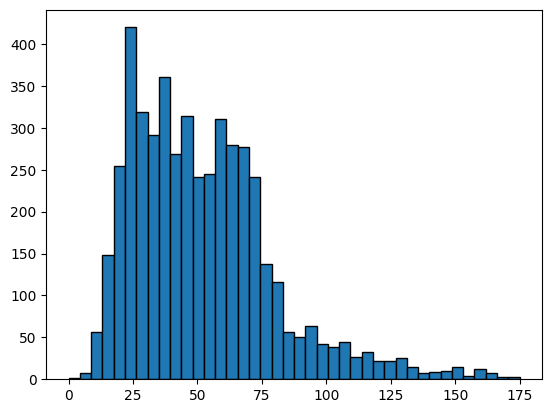

In [101]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
df["proc_overview"] = df["overview"].apply(lambda x: remove_punctuation(x.lower()))

# get the word lengths of each overview and store it in a list 
overview_lens = []
overview_lens = df["proc_overview"].apply(lambda x: len(x.split()))

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(df["overview_len"], bins = "auto", edgecolor='black')
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

In [102]:
print(f"Shortest overview: {df['overview_len'].min()}")
print(f"Longest overview: {df['overview_len'].max()}")
print(df['overview_len'].quantile(0.10))
print(df['overview_len'].quantile(0.80))

Shortest overview: 0
Longest overview: 175
22.0
70.0


I would drop overviews with less words and truncating words longer than length 15-25 as it allows proper sentences yet cuts out too short ones without getting rid without most of the overviews

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [103]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"]>=token_len]

# split each proc_overview into a list of words, select the first token_len words, 
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x.split()[:token_len])

# print to verify
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[adam, a, security, guard, travels, from, cali...",115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[el, mariachi, just, wants, to, play, his, gui...",62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[signed, sealed, delivered, introduces, a, ded...",73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, ambitious, new, york, attorney, sam, is...",65


In [117]:

df = df.dropna() # drop na values
df = df.reset_index(drop=True)
df 

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275129552, 1.2545637565422019, 1.06...",5
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.37807293005891823, -1.5934718497721914, 0....",3
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9128810490622166, 1.1768562611975217, 0.80...",18
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8229543741732277, -0.44848628373418736, 0.5...",11
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10117960365989243, -0.22882078000602038, 0...",17
...,...,...,...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[adam, a, security, guard, travels, from, cali...",115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.16452917101861714, -0.35828760782360103, 0...",15
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[el, mariachi, just, wants, to, play, his, gui...",62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4396168512076999, -1.132957884799493, 0.369...",7
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[signed, sealed, delivered, introduces, a, ded...",73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3907208334791823, 0.5742052146660707, -0.26...",8
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, ambitious, new, york, attorney, sam, is...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3015446623294413, -1.1754163046972959, 0.7...",3


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [118]:
# hint: store all words for all movies in a set, change it to a list and sort
unique_words = sorted(list(set().union(*df["proc_overview"])))
vocab_len = len(unique_words)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [119]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(encode_labels(word, unique_words)) # get encoding for this word
    sentence_encode = np.sum(sentence_encode, axis = 0) # sum over axis=1
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:09<00:00, 476.62it/s]


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4702    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4703    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4704    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4705    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4706    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

12493 * 4800 * 16 bytes, which is 959462400 bytes

In [120]:
print(f"{12493 * 4800 * 16}")

959462400


# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

C:\Users\anjic\AppData\Local\Temp\ipykernel_27828\956294722.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_decomp[:, 0], pca_decomp[:, 1], cmap='tab10', alpha=0.6, s=1)


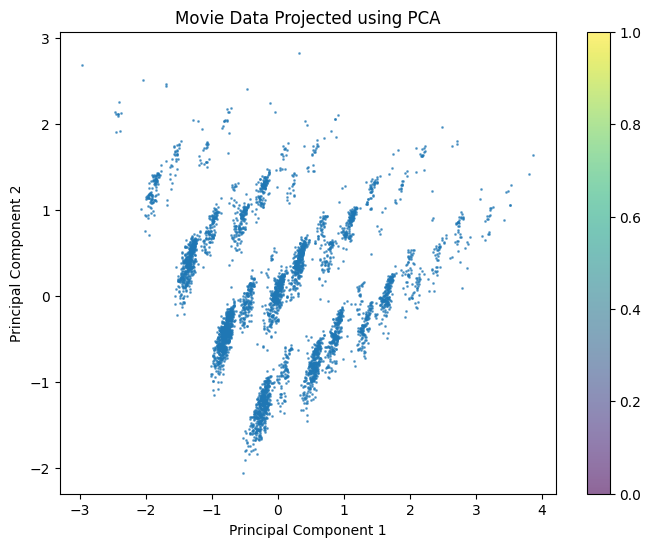

In [121]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
pca = PCA()
pca_decomp = pca.fit(np.array(encoded_labels))
pca_decomp = pca.transform(np.array(encoded_labels))

plt.figure(figsize=(8, 6))
plt.scatter(pca_decomp[:, 0], pca_decomp[:, 1], cmap='tab10', alpha=0.6, s=1)
plt.colorbar()
plt.title('Movie Data Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

Yes. The points that are clustered have similar vocabulary.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [122]:
print(f"Variance information lost: {sum(pca.explained_variance_ratio_) - sum(pca.explained_variance_ratio_[:2])}")

Variance information lost: 0.887115491324654


Total explained variance ratio of our principal component analysis is approximately 11.3%. If we consider both components we lose around 88.7% of variance information.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

In [123]:
print(f"{sum(pca.explained_variance_ratio_ >= 1/len(pca.explained_variance_ratio_))}")
n_kaisers_rule
pca.explained_variance_ratio_

787


array([6.99187951e-02, 4.29657136e-02, 2.33381457e-02, ...,
       3.94496830e-06, 3.80692680e-06, 8.21069422e-32])

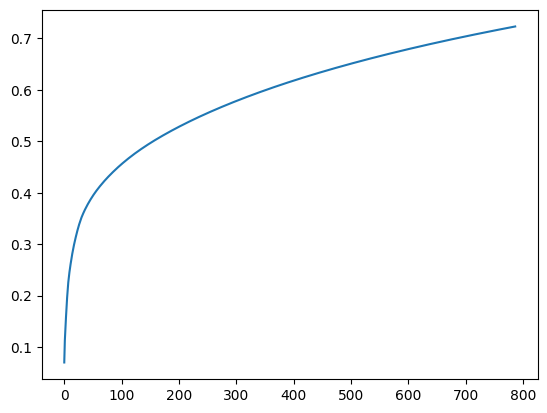

In [124]:
# Set up PCA object with the desired number of components

# fit transform one_hot_overview encodings
#labels_pca = ...
# get explained variance ratio from object, store it in a list


#plt.plot(...)
# set up y label, x label, title 
#plt.show()

n_kaisers_rule = sum(pca.explained_variance_ratio_ >= 1/len(pca.explained_variance_ratio_))
#plt.yscale('log')
plt.plot(pca.explained_variance_ratio_[:n_kaisers_rule].cumsum())
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [125]:
total_variance = 0
for i  in range(len(pca.explained_variance_ratio_)):
  total_variance = total_variance + pca.explained_variance_ratio_[i]
  if total_variance >= 0.8:
    print(str(i + 1))
    break

1226


1226 principal components

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [126]:
n_dims = 1226
pca_new = PCA(n_components=n_dims)
labels_pca = pca_new.fit_transform(np.array(encoded_labels))
df["overview_pca"] = labels_pca.tolist()
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275128933, 1.2545637565428878, 1.06...",5
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3780729300588784, -1.5934718497723306, 0.9...",3
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9128810490621968, 1.176856261198509, 0.806...",18
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8229543741730749, -0.44848628373442206, 0.5...",11
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10117960365983274, -0.22882078000682546, 0...",17
...,...,...,...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[adam, a, security, guard, travels, from, cali...",115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.16452917101868472, -0.3582876078238426, 0....",15
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[el, mariachi, just, wants, to, play, his, gui...",62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4396168512078032, -1.1329578847989041, 0.36...",7
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[signed, sealed, delivered, introduces, a, ded...",73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3907208334792187, 0.5742052146663781, -0.26...",8
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, ambitious, new, york, attorney, sam, is...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3015446623294312, -1.175416304697203, 0.77...",3


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [127]:

# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans = kmeans.fit(labels_pca)

y_preds = kmeans.predict(labels_pca) # get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
df["title"][df["cluster_kmeans"]==0]

2                           Spectre
86                     Tomorrowland
240                     San Andreas
259     Around the World in 80 Days
265       The Princess and the Frog
                   ...             
4613               The Woman Chaser
4614                  The Horse Boy
4634                   Penitentiary
4648                     Queen Crab
4677            Mutual Appreciation
Name: title, Length: 174, dtype: object

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

No. The movies are not similar. They are not even from the same genre

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

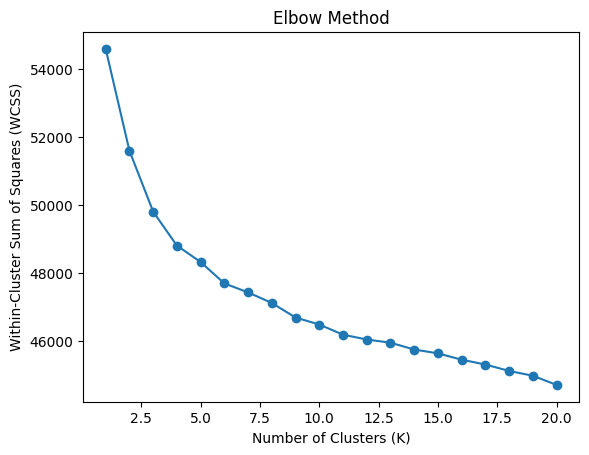

In [128]:
wcss = []
k_values = range(1, 21)
for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(labels_pca.tolist())
  wcss.append(kmeans.inertia_)

#Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

3 clusters

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [129]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(labels_pca)
df['cluster_gmm'] = gmm.predict(labels_pca)

for i in range(len(labels_pca)):
  if gmm.predict([labels_pca[i]]) == 1:
    print(df['title'][i], "+" , df['proc_genres'][i] )


Tangled + Animation
Terminator Salvation + Action
Indiana Jones and the Kingdom of the Crystal Skull + Action
Jupiter Ascending + Action
The Dark Knight + Action
Hugo + Drama
Captain America: The Winter Soldier + Action
The Hunger Games: Mockingjay - Part 2 + Adventure
The Sorcerer's Apprentice + Adventure
Transformers + Action
Harry Potter and the Goblet of Fire + Adventure
The Matrix Reloaded + Thriller
Mad Max: Fury Road + Thriller
Troy + Adventure
Lethal Weapon 4 + Action
Final Fantasy: The Spirits Within + Thriller
The Twilight Saga: Breaking Dawn - Part 2 + Drama
Ant-Man + Science Fiction
Puss in Boots + Family
How the Grinch Stole Christmas + Family
The Day After Tomorrow + Thriller
Elysium + Action
Gulliver's Travels + Comedy
The Green Hornet + Crime
300: Rise of an Empire + Action
Real Steel + Science Fiction
The Taking of Pelham 1 2 3 + Thriller
Eraser + Action
Starship Troopers + Action
In the Heart of the Sea + Action
Gangs of New York + History
The Departed + Drama
Die Har

**Q5.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

It is hard to tell. It seems to me that both clusterings dont give the movies which are very similar. If I had to choose, I would prefer this one

**Q5.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

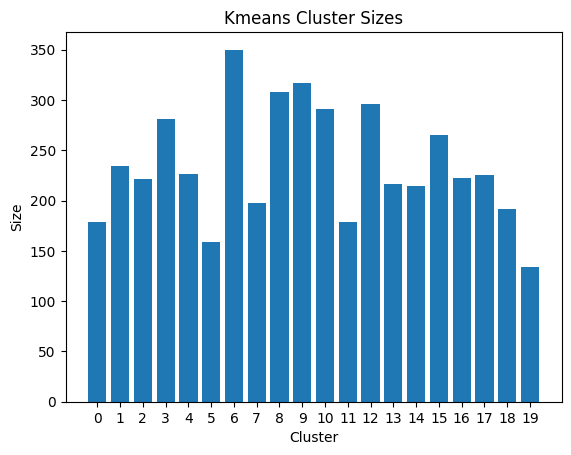

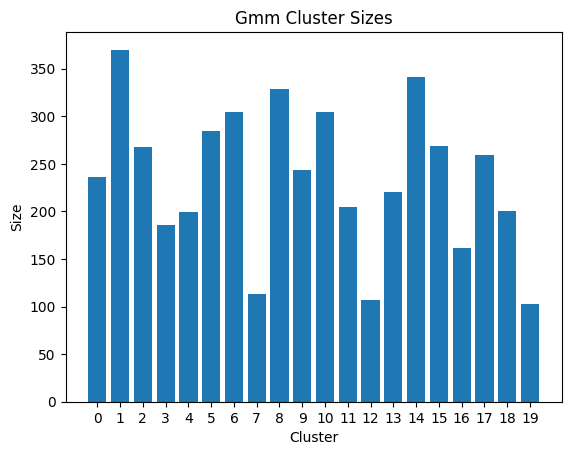

In [131]:
# Create an array for the x-axis positions
clusternums = np.arange(20)
clustersizes = np.bincount(kmeans.predict(labels_pca))

fig, ax = plt.subplots()
# Plotting the bars
ax.bar(clusternums, clustersizes)
# Add labels, title, and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Size')
ax.set_title('Kmeans Cluster Sizes')
ax.set_xticks(clusternums)
ax.set_xticklabels(clusternums)
plt.show()

# Create an array for the x-axis positions
clusternums = np.arange(20)
clustersizes = np.bincount(gmm.predict(labels_pca))

fig, ax = plt.subplots()
# Plotting the bars
ax.bar(clusternums, clustersizes)
# Add labels, title, and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Size')
ax.set_title('Gmm Cluster Sizes')
ax.set_xticks(clusternums)
ax.set_xticklabels(clusternums)
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

Yes, between two methods of clustering and between the sizes of clusters for each method. Kmeans is more uniformly distributed

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [134]:
prev_watch = 'Avatar'

indexmovie = df['title'].tolist().index(prev_watch)
gmm_cluster = df['cluster_gmm'][indexmovie]
kmeans_cluster = df['cluster_kmeans'][indexmovie]

for i in range(len(df['title'].tolist())):
  if df['cluster_gmm'][i] == gmm_cluster:
    print(df['title'][i])
    
for i in range(len(df['title'].tolist())):
  if df['cluster_kmeans'][i] == kmeans_cluster:
    print(df['title'][i])

Avatar
Waterworld
The Jungle Book
Shin Godzilla
Poseidon
Charlie and the Chocolate Factory
Angels & Demons
The Revenant
R.I.P.D.
Pirates of the Caribbean: The Curse of the Black Pearl
San Andreas
Django Unchained
Cloud Atlas
The Fifth Element
Seventh Son
Mulan
Bicentennial Man
Volcano
Conan the Barbarian
Safe House
Tower Heist
Shutter Island
Robots
Spirit: Stallion of the Cimarron
Jarhead
Rock of Ages
Osmosis Jones
Need for Speed
Kangaroo Jack
Man on Fire
The Tale of Despereaux
Joy
Intolerable Cruelty
Supernova
Inkheart
Leatherheads
Resident Evil: Afterlife
The Pursuit of Happyness
Blade II
Mamma Mia!
Crazy, Stupid, Love.
Absolute Power
The Peacemaker
Basic
Jade
Anna Karenina
Riding in Cars with Boys
Star Trek: First Contact
Miss Congeniality
The Client
Training Day
Galaxy Quest
Yours, Mine and Ours
All the Pretty Horses
Deep Rising
Argo
Lucy
17 Again
The Lincoln Lawyer
Apocalypto
Snowpiercer
Baahubali: The Beginning
Dolphin Tale
The Cell
The Pianist
Predator 2
Midnight in the Garden o

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

No. For the reasons mentioned above

**Q6.3** How would you try making the recommender systems better?

Same genre/considering other variables that indicate the movies nature (ex. actors in it, directors etc.)

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

Consider all the clusters of the movies he watched as this indicates his interests.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [138]:
def cosine_sim(v1, v2):
    dot_product = np.dot(v1, v2)
    length_v1 = np.linalg.norm(v1)
    length_v2 = np.linalg.norm(v2)
    return dot_product/(length_v2 * length_v1)

# get overview_pca encoding of previously watched film
prev_watch_enc = df['overview_pca'][indexmovie]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row['overview_pca']))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by = 'cos_sim_to_avatar', ascending = False)
df # print to verify

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275128933, 1.2545637565428878, 1.06...",7,2,1.000000
3318,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[a, warlock, flees, from, the, 17th, to, the, ...",122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14285163674541174, 1.1940360295721903, 1.00...",3,2,0.533255
3725,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[sam, ellis, is, a, man, on, the, rise, a, hot...",48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2149756152197725, 1.4085478017732618, 0.514...",7,2,0.474520
1272,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[the, nomad, is, a, historical, epic, set, in,...",39,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2502330102123784, 1.4192751540292792, 0.331...",7,4,0.472141
411,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, future, america, is, a, dystopian, w...",87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23152067361946038, 1.4016470372929393, 0.35...",7,4,0.455414
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[each, christmas, santa, and, his, vast, army,...",76,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.060378004907864886, -1.2501400290542706, -1...",17,17,-0.323020
4544,The Incredibly True Adventure of Two Girls In ...,An adventurous love story between two young wo...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",Romance,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[an, adventurous, love, story, between, two, y...",27,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14070632835139663, -0.8539432716622326, -0....",11,13,-0.324204
3495,A Room for Romeo Brass,"Two twelve-year-old boys, Romeo and Gavin, und...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[two, twelveyearold, boys, romeo, and, gavin, ...",53,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09297364291408813, -1.2254547025334004, -1....",17,17,-0.327416
16,The Avengers,When an unexpected enemy emerges and threatens...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, an, unexpected, enemy, emerges, and, th...",47,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0905263949622663, -1.2128535249919432, -1.4...",17,17,-0.328472


Seems better than previous suggestion tools.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [137]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

I am sorry :(

Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)